### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

#Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# constraints
alpha = 5e-2
T_0 = 20

# initial condition
T0 = 50
dT0 = 5 # initial guess

# boundary condition
xf = 10
Tf = 200

def rhs(T, x):
    return [T[1], -alpha*(T_0 - T[0])]

xs = np.linspace(0, 10, 200)

def plot_graph(title, T, x, Tf, xf):
    plt.figure(figsize=(10,7))
    # plot the solution
    plt.plot(x, T[:, 0], lw=2)
    # plot the boundary at t_final
    plt.plot(xf, Tf, 'ro')
    plt.xlabel('x')
    plt.ylabel('T')
    plt.title(title)
    plt.grid()
    plt.show()

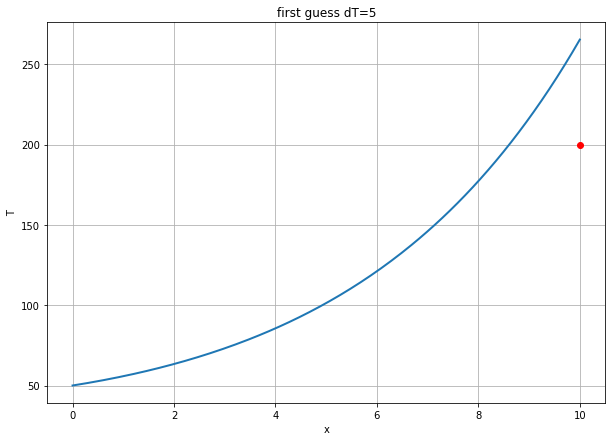

In [39]:
from scipy.integrate import odeint

plot_graph(f'first guess dT={dT0}', odeint(rhs, [T0, dT0], xs), xs, Tf, xf)

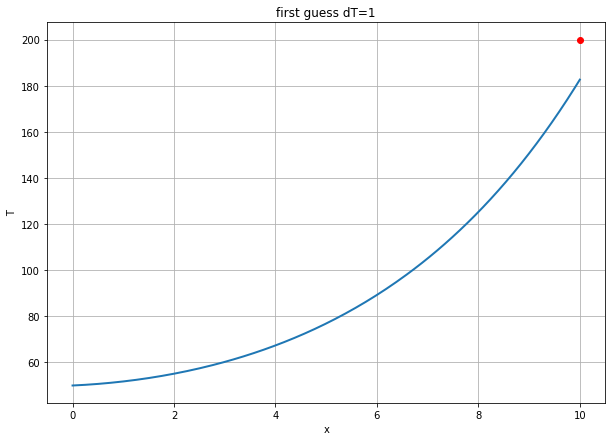

In [40]:
dT0 = 1
plot_graph(f'first guess dT={dT0}', odeint(rhs, [T0, dT0], xs), xs, Tf, xf)

f(a)= 65.36378274149445
f(b)= -17.367073532556248
Answer is 1.839690290476148


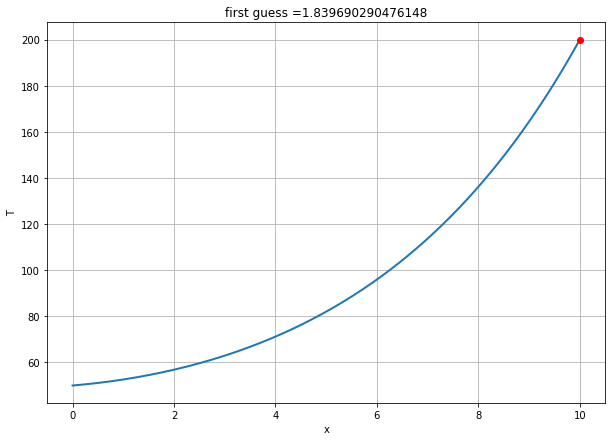

In [41]:
from scipy.optimize import brentq

def objective_func(dT0):
    sol = odeint(rhs, [T0, dT0], xs)
    T_final = sol[-1, 0]
    return T_final - Tf

print('f(a)=', objective_func(5))
print('f(b)=', objective_func(1))

dT0 = brentq(objective_func, 5, 1)

print(f'Answer is {dT0}')
plot_graph(f'first guess ={dT0}', odeint(rhs, [T0, dT0], xs), xs, Tf, xf)

___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

$$\frac{d^2T}{dx^2} = \frac{T_{i-1}-2T_i+T_{i+1}}{h^2} = - \alpha (T_0 - T_i)$$

$$
\frac{d^2T}{dx^2} = T_{i-1}-(h^2 \alpha +2)T_i+T_{i+1}{h^2} = - T_0 h^2 \alpha
$$

$$
\left[ 
{\begin{array}{*{20}{c}}
1 & 0 & & &\\
1 & -(h^2 \alpha + 2) & 1 & &\\
& \ddots & \ddots & \ddots & \\
& & 1 & -(h^2 \alpha + 2) & 1 \\
& & & & 1 
\end{array}} 
\right]
\left[
{\begin{array}{*{20}{c}}
T_0 \\
T_1 \\
\vdots \\
T_{n-1}\\
T_n
\end{array}} 
\right]
= 
\left[
{\begin{array}{*{20}{c}}
50 \\
- T_0 h^2 \alpha \\
\vdots \\
- T_0 h^2 \alpha\\
200
\end{array}} 
\right]
$$

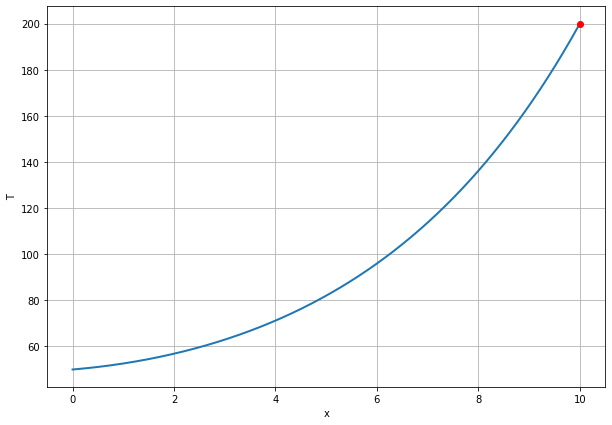

In [46]:
n = 1000
h = (10-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -(h**2 * alpha + 2)
    A[i, i+1] = 1

# Get b
b = np.zeros(n+1)
b[0] = 50
b[1:-1] = - T_0 * h**2 * alpha
b[-1] = 200

# solve the linear equations A x = b
T = np.linalg.solve(A, b)

x = np.linspace(0, 10, n + 1)

plt.figure(figsize=(10,7))
plt.plot(x, T, lw=2)
plt.plot(xf, Tf, 'ro')
plt.xlabel('x')
plt.ylabel('T')
plt.grid()
plt.show()